In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import tflearn
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
%autosave 30


hdf5 not supported (please install/reinstall h5py)
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [109]:
import seaborn as sns

In [13]:


tf.reset_default_graph()

mb_size = 128

k = 10
d = 10

image_width = 28
z_dim = k*d
X_dim = mnist.train.images.shape[1]
y_dim = mnist.train.labels.shape[1]
h_dim = 128
c = 0
lr = 1e-3


def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig


def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)


# =============================== Q(z|X) ======================================

X = tf.placeholder(tf.float32, shape=[None, X_dim])
z = tf.placeholder(tf.float32, shape=[None, z_dim])




Q_W1 = tf.Variable(xavier_init([X_dim, h_dim]))
Q_b1 = tf.Variable(tf.zeros(shape=[h_dim]))

Q_W2_mu = tf.Variable(xavier_init([h_dim, z_dim]))
Q_b2_mu = tf.Variable(tf.zeros(shape=[z_dim]))

Q_W2_sigma = tf.Variable(xavier_init([h_dim, z_dim]))
Q_b2_sigma = tf.Variable(tf.zeros(shape=[z_dim]))


def Q(X):
    
    m = tflearn.layers.fully_connected(X, 128, activation = 'relu')
    z_mu = tflearn.layers.fully_connected(m, z_dim, activation = 'linear')
    z_logvar = tflearn.layers.fully_connected(m, z_dim, activation = 'linear')

#     h = tf.nn.relu(tf.matmul(X, Q_W1) + Q_b1)
#     z_mu = tf.matmul(h, Q_W2_mu) + Q_b2_mu
#     z_logvar = tf.matmul(h, Q_W2_sigma) + Q_b2_sigma
    return z_mu, z_logvar


def sample_z(mu, log_var):
    eps = tf.random_normal(shape=tf.shape(mu))
    return mu + tf.exp(log_var / 2) * eps


# =============================== P(X|z) ======================================

P_W1 = tf.Variable(xavier_init([z_dim, h_dim]))
P_b1 = tf.Variable(tf.zeros(shape=[h_dim]))

P_W2 = tf.Variable(xavier_init([h_dim, X_dim]))
P_b2 = tf.Variable(tf.zeros(shape=[X_dim]))


def P(z):
    h = tflearn.layers.fully_connected(z, 128, activation = 'relu')
    logits = tflearn.layers.fully_connected(h, X_dim, activation = 'linear')

#     h = tf.nn.relu(tf.matmul(z, P_W1) + P_b1)
#     logits = tf.matmul(h, P_W2) + P_b2
    prob = tf.nn.sigmoid(logits)
    return prob, logits
#     return tf.nn.sigmoid(m), m

# =============================== TRAINING ====================================

z_mu, z_logvar = Q(X)
z_sample = sample_z(z_mu, z_logvar)
pixels_pred, logits = P(z_sample)

# Sampling from random z
X_samples, _ = P(z)

# E[log P(X|z)]
# recon_loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits, X), 1)
recon_loss = tf.reduce_sum(tf.square(pixels_pred - X), 1)

# D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
kl_loss = 0.5 * tf.reduce_sum(tf.exp(z_logvar) + z_mu**2 - 1. - z_logvar, 1)
# VAE loss
vae_loss = tf.reduce_mean(recon_loss + kl_loss)

solver = tf.train.AdamOptimizer().minimize(vae_loss)

sess = tf.Session()
sess.run(tf.initialize_all_variables())


i = 0

record = []

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [207]:


tf.reset_default_graph()

mb_size = 128

k = 20
d = 20

image_width = 28
z_dim = k*d
X_dim = mnist.train.images.shape[1]
y_dim = mnist.train.labels.shape[1]
h_dim = 128
c = 0
lr = 1e-3


def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig


def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)


# =============================== Q(z|X) ======================================

X = tf.placeholder(tf.float32, shape=[None, X_dim])
z = tf.placeholder(tf.float32, shape=[None, z_dim])
input_sequence = tf.placeholder(tf.float32, shape=[None, k, d])




def Q(X):
    
    m = tflearn.layers.fully_connected(X, 256, activation = 'relu')
#     m = tflearn.layers.fully_connected(m, 128, activation = 'relu')
    m = tflearn.layers.fully_connected(m, 128, activation = 'relu')
    z = tflearn.layers.fully_connected(m, z_dim, activation = 'linear')
    return z


def sample_z(mu, log_var):
    eps = tf.random_normal(shape=tf.shape(mu))
    return mu + tf.exp(log_var / 2) * eps


# =============================== P(X|z) ======================================

def P(z_in):
    h = tflearn.layers.fully_connected(z_in, 128, activation = 'relu')
#     h = tflearn.layers.fully_connected(h, 128, activation = 'relu')
    h = tflearn.layers.fully_connected(h, 128, activation = 'relu')
    logits = tflearn.layers.fully_connected(h, 28**2, activation = 'linear')

    prob = tf.nn.sigmoid(logits)
    return prob, logits
#     return tf.nn.sigmoid(m), m

# =============================== TRAINING ====================================

z_pred = Q(X)
z_pred += tf.random_normal(shape=tf.shape(z_pred), mean=0.0, stddev=tf.nn.moments(z_pred,axes=[0])[1]*1, dtype=tf.float32)

z_mat = tf.reshape(z_pred, [-1, k,d])

# z_sample = sample_z(z_mu, z_logvar)

symbol_mat = tf.nn.softmax(z_mat, dim=1, name=None)
entropy_row = -tf.reduce_mean(symbol_mat * tf.log(symbol_mat+.00001))


with tf.variable_scope("p"):
    pixels_pred, logits = P(tf.reshape(symbol_mat, [-1, z_dim]))

with tf.variable_scope("p", reuse = True):
    pixels_generated = P(tf.reshape(input_sequence, [-1, z_dim]))
    
# # Sampling from random z
# with tf.variable_scope("p", reuse= True):
#     z_pred = Q(X)
#     z_mat = tf.reshape(z_pred, [-1, k,d])

#     # z_sample = sample_z(z_mu, z_logvar)

#     symbol_mat = tf.nn.softmax(z_mat, dim=1, name=None)
#     entropy_row = -tf.reduce_mean(symbol_mat * tf.log(symbol_mat+.00001))
#     X_samples, _ = P(tf.reshape(symbol_mat, [-1, z_dim]))

# E[log P(X|z)]
# recon_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits, X), 1)
recon_loss = tf.reduce_mean(tf.square(pixels_pred - X), 1)

# D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
# kl_loss = 0.5 * tf.reduce_sum(tf.exp(z_logvar) + z_mu**2 - 1. - z_logvar, 1)



# batchwise_sums = tf.reduce_sum(tf.exp(z_mat), 0)
# batchwise_p_mat = tf.exp(z_mat) / tf.reshape(batchwise_sums, [1, k,d])
# total_entropy = tf.reduce_mean(batchwise_p_mat * tf.log(batchwise_p_mat+.01)) 
p_mat = tf.nn.softmax(z_mat, dim=0, name=None)
total_entropy = -tf.reduce_mean(p_mat * tf.log(p_mat+.001))
total_entropy = tf.reduce_mean(tf.abs(p_mat - tf.ones_like(p_mat)))

# VAE loss
vae_loss = tf.reduce_mean(recon_loss*2 + entropy_row * 1 + total_entropy*1)

solver = tf.train.AdamOptimizer(learning_rate = .001).minimize(vae_loss)

sess = tf.Session()
sess.run(tf.initialize_all_variables())


i = 0

record = []

Instructions for updating:
Use `tf.global_variables_initializer` instead.


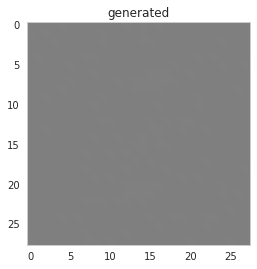

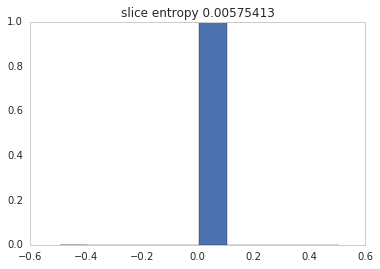

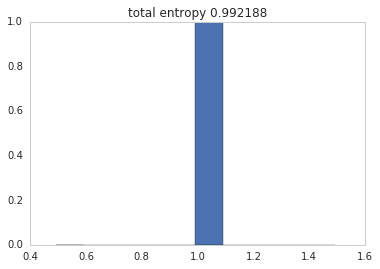

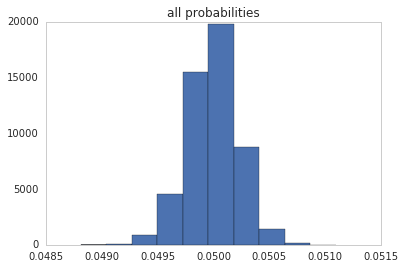

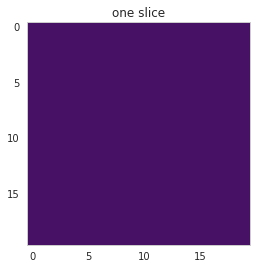

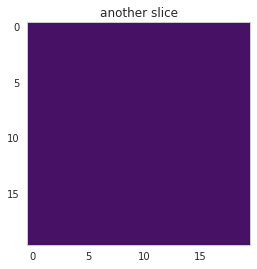

0.05


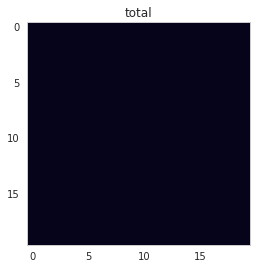

Iter: 0
Loss: 1.605
()


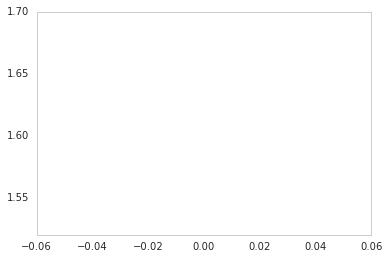

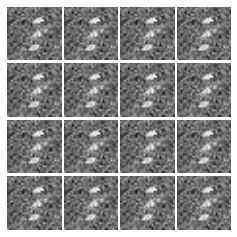

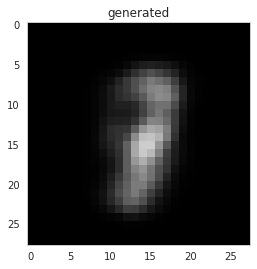

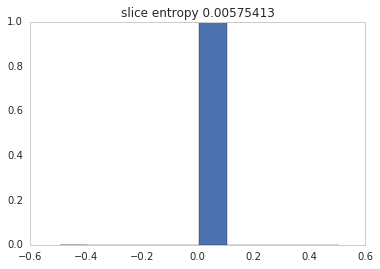

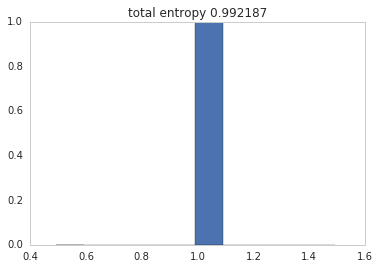

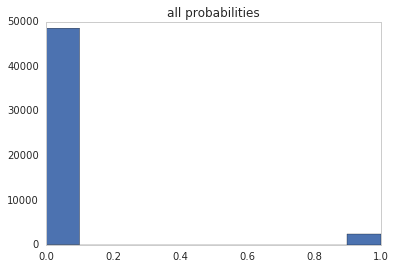

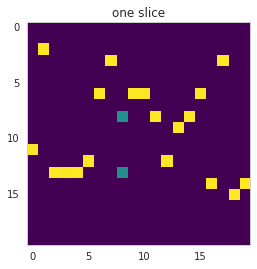

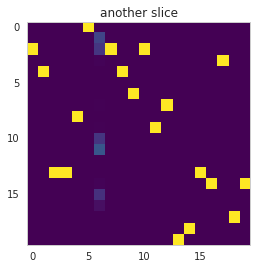

0.05


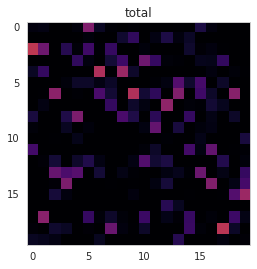

Iter: 1000
Loss: 1.128
()


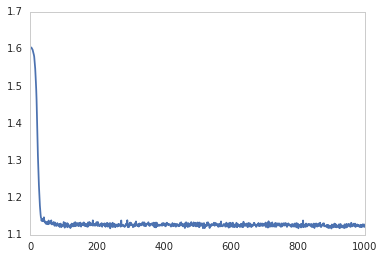

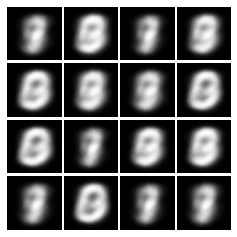

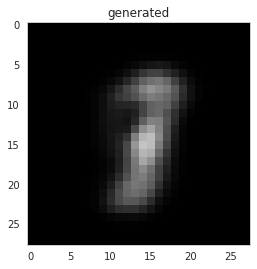

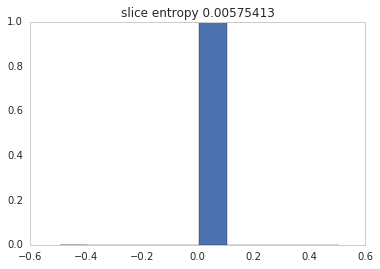

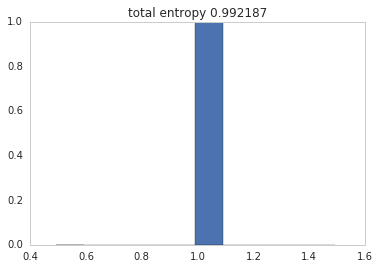

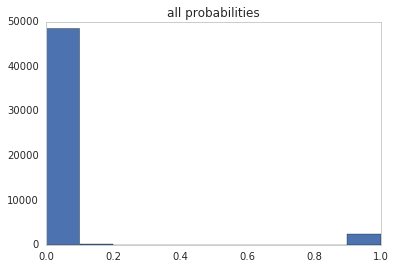

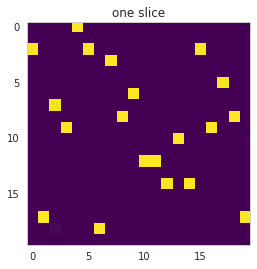

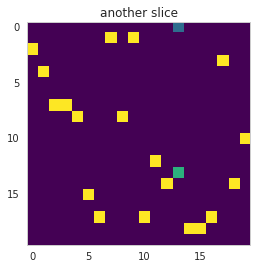

0.05


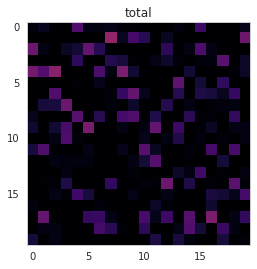

Iter: 2000
Loss: 1.119
()


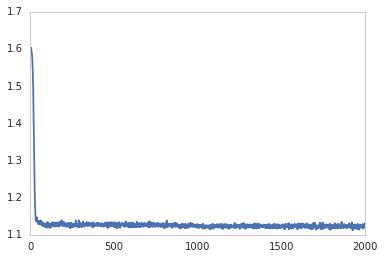

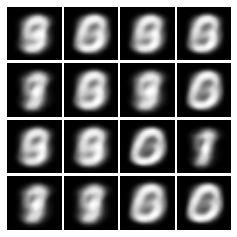

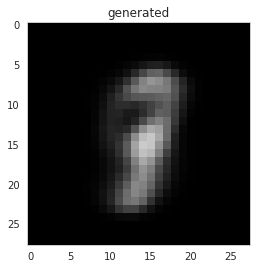

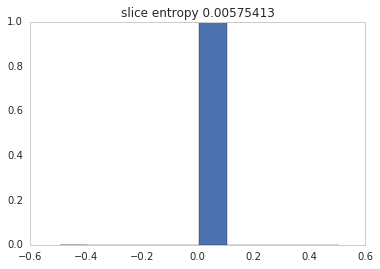

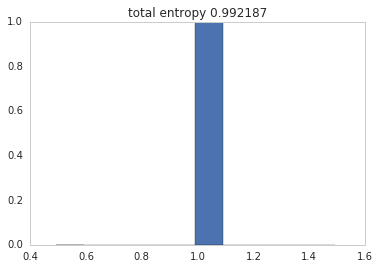

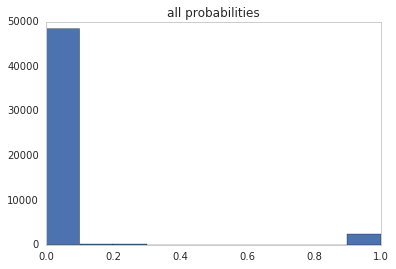

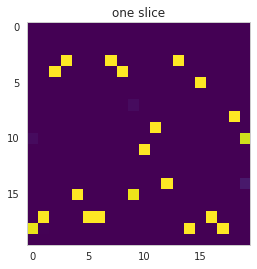

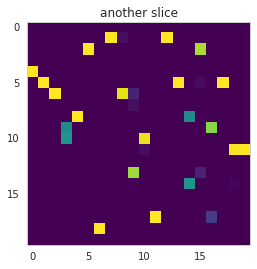

0.05


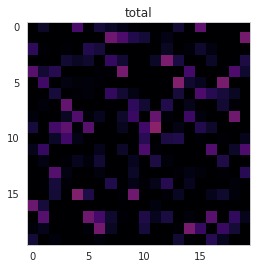

Iter: 3000
Loss: 1.128
()


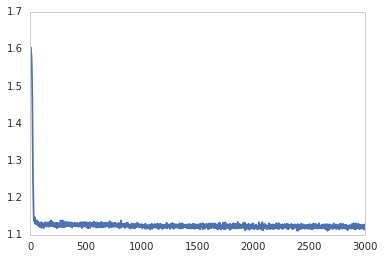

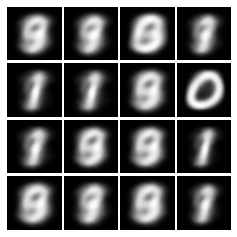

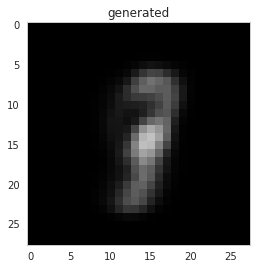

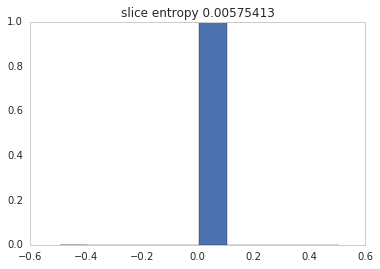

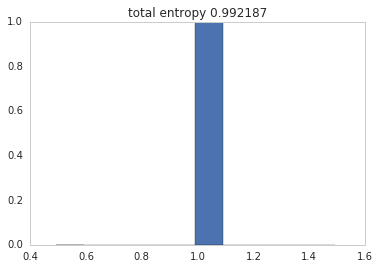

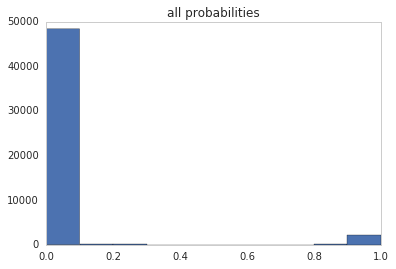

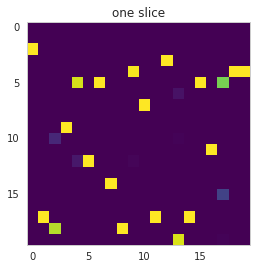

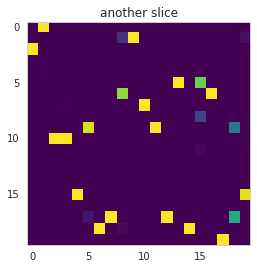

0.05


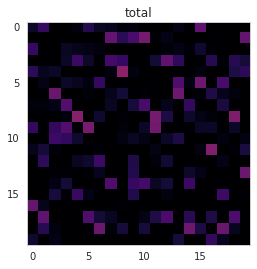

Iter: 4000
Loss: 1.126
()


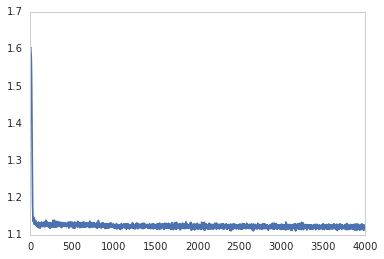

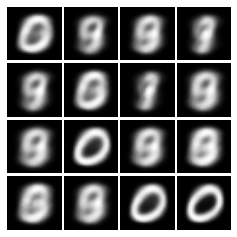

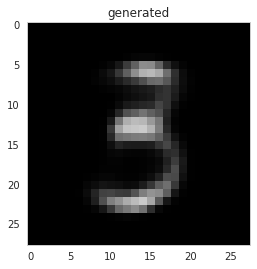

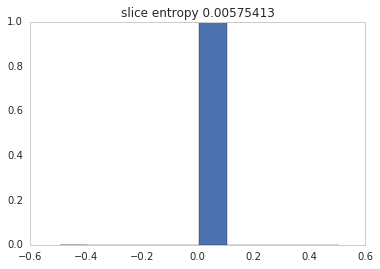

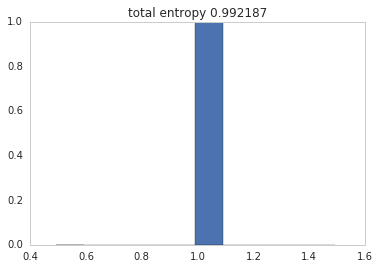

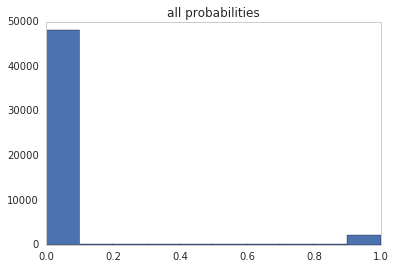

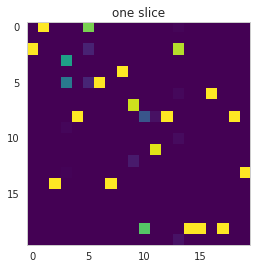

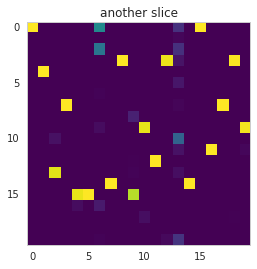

0.05


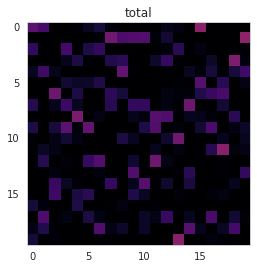

Iter: 5000
Loss: 1.111
()


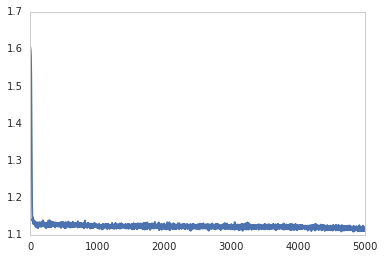

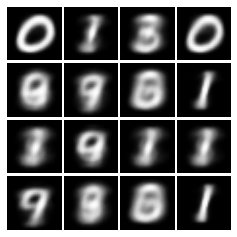

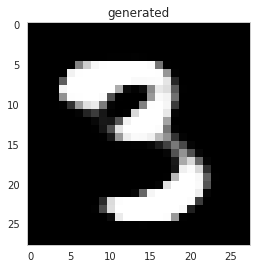

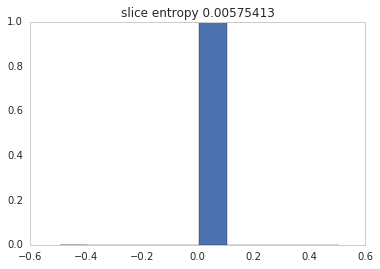

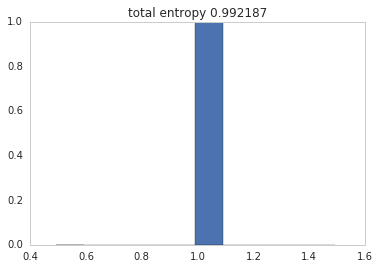

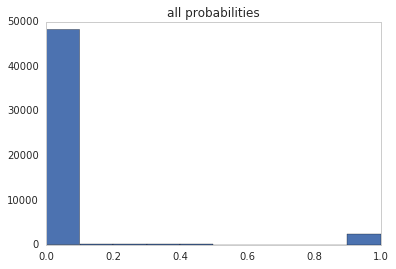

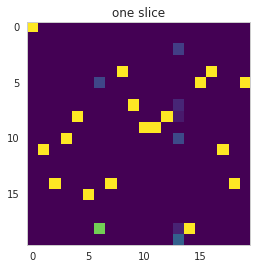

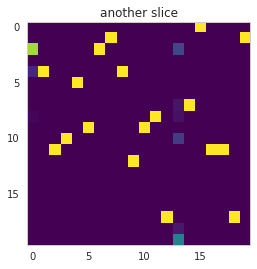

0.05


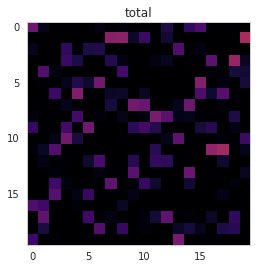

Iter: 6000
Loss: 1.084
()


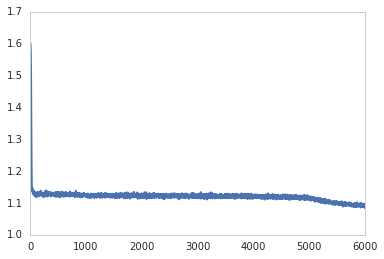

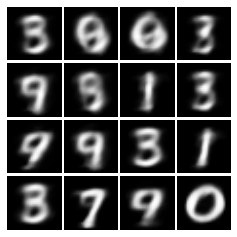

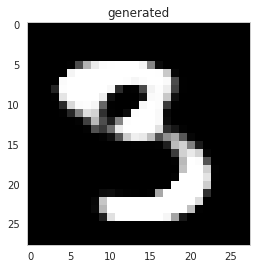

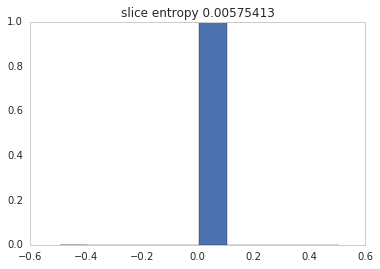

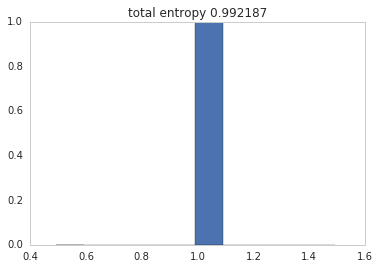

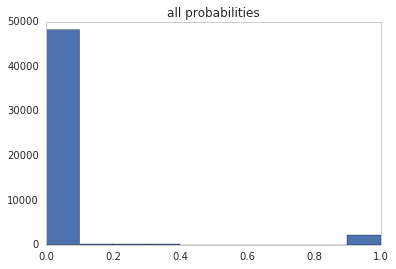

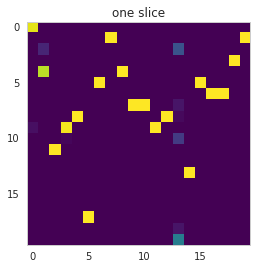

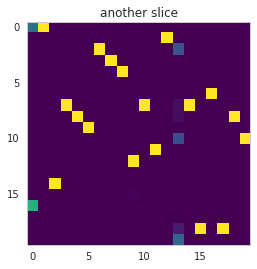

0.05


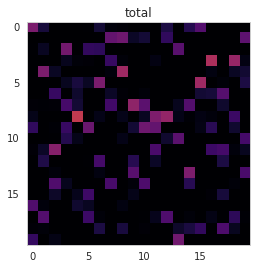

Iter: 7000
Loss: 1.088
()


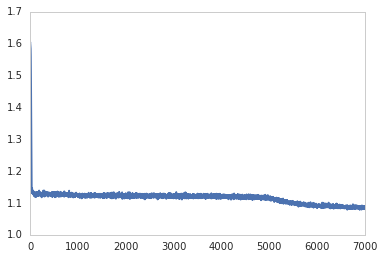

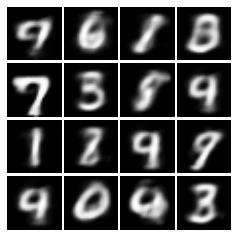

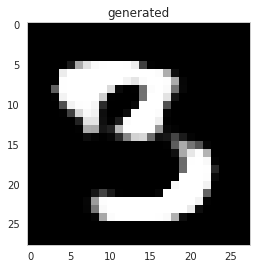

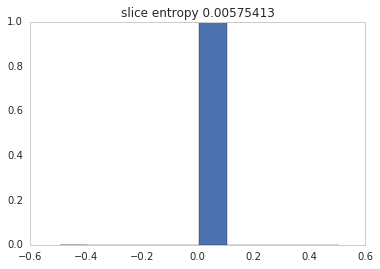

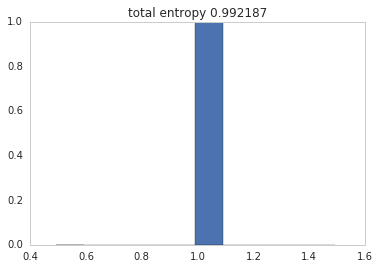

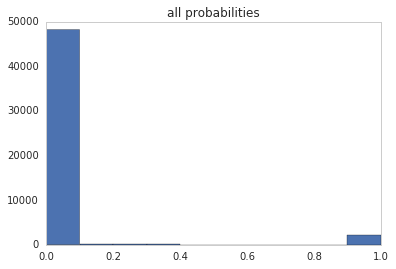

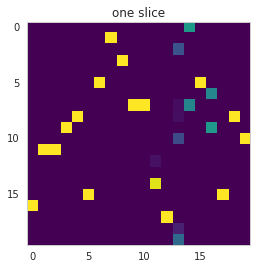

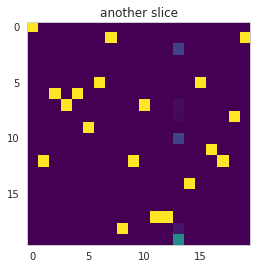

0.05


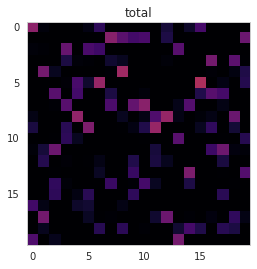

Iter: 8000
Loss: 1.081
()


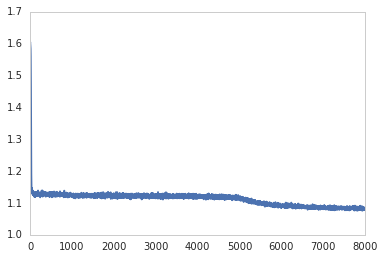

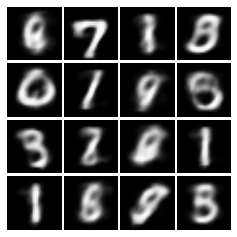

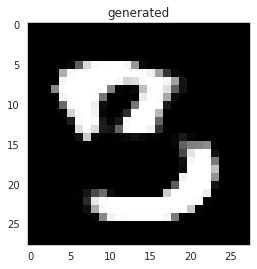

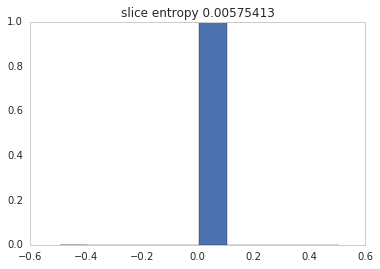

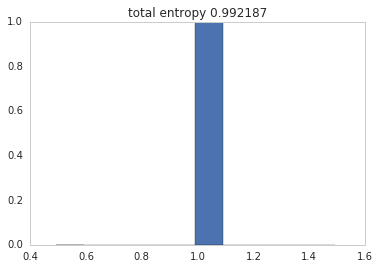

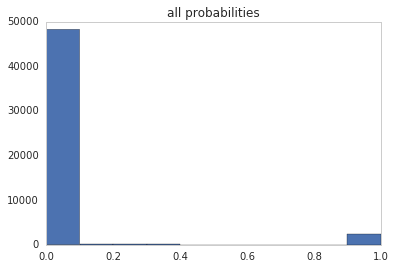

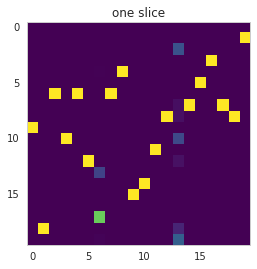

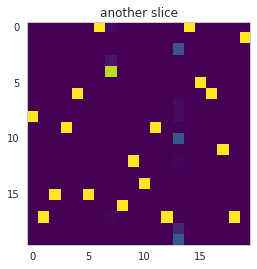

0.05


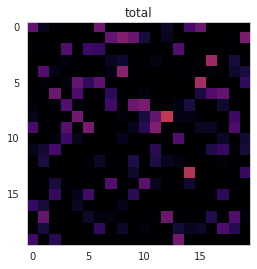

Iter: 9000
Loss: 1.077
()


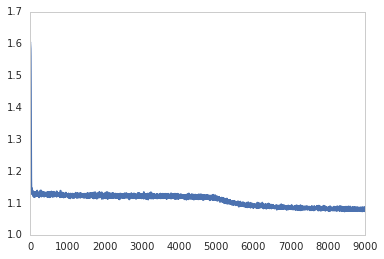

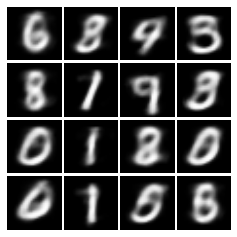

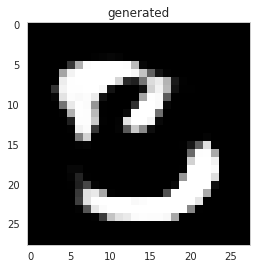

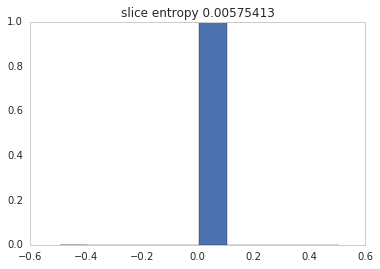

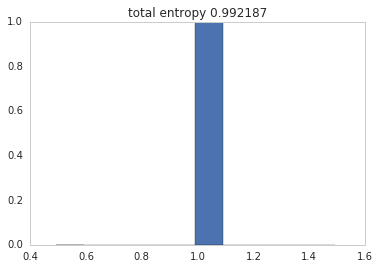

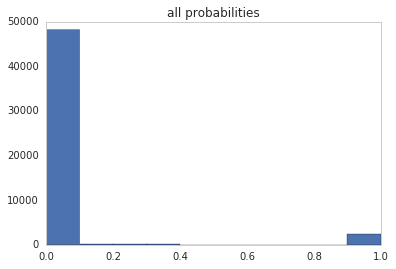

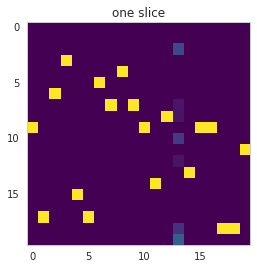

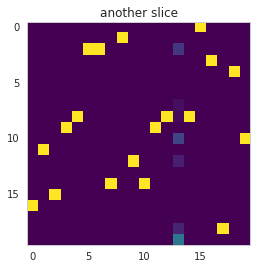

0.05


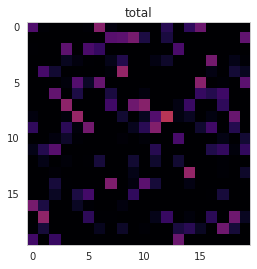

Iter: 10000
Loss: 1.072
()


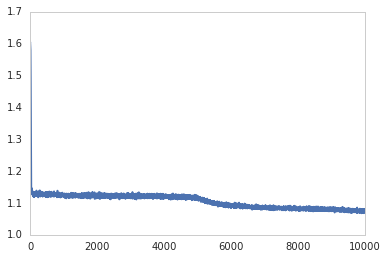

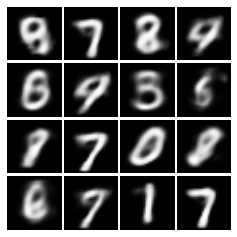

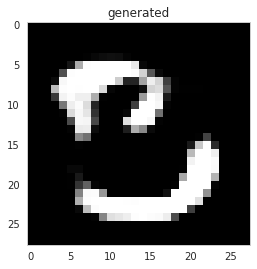

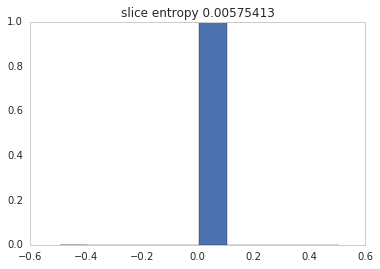

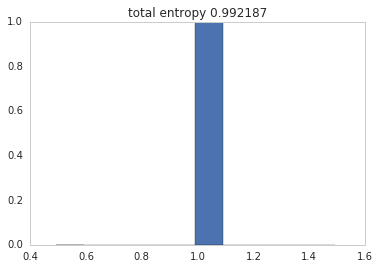

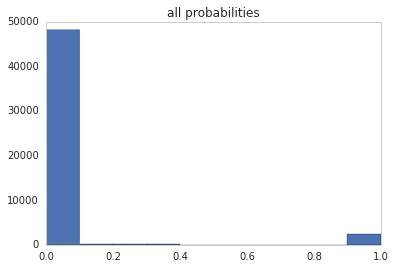

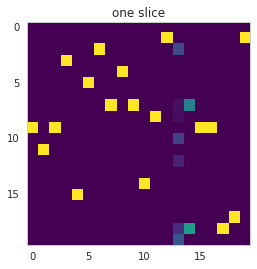

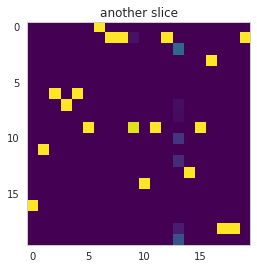

0.05


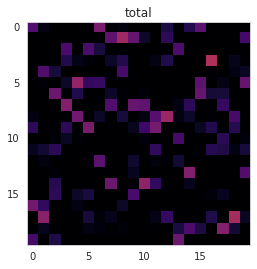

Iter: 11000
Loss: 1.073
()


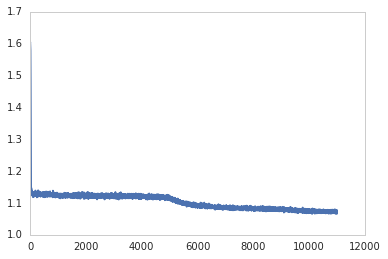

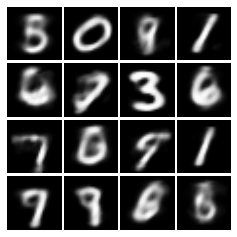

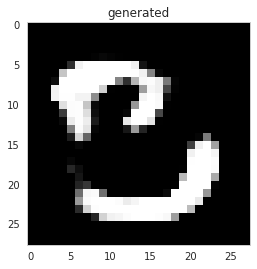

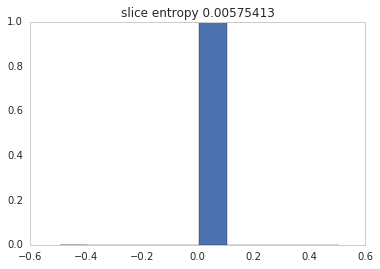

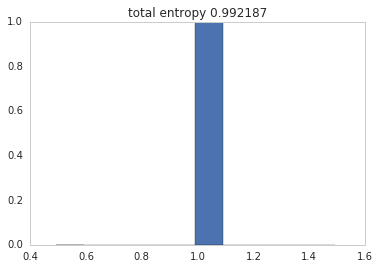

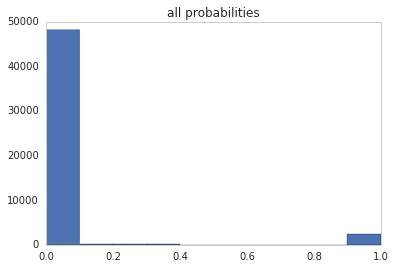

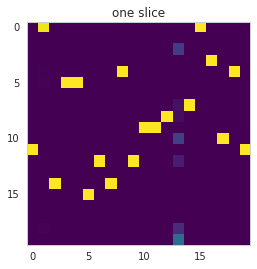

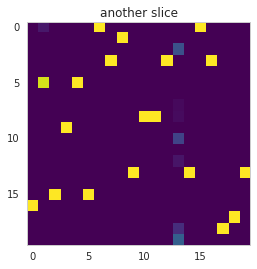

0.05


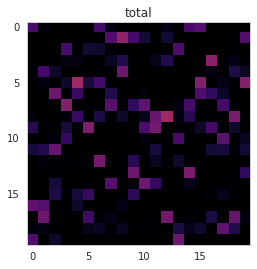

Iter: 12000
Loss: 1.069
()


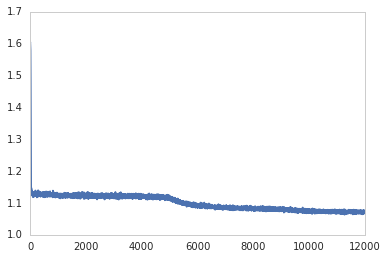

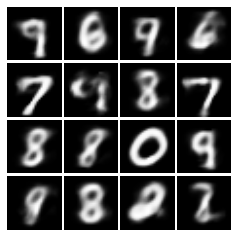

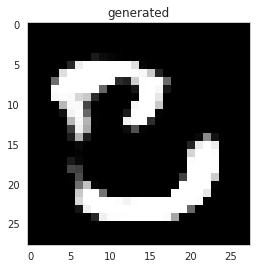

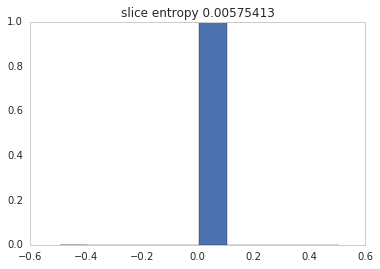

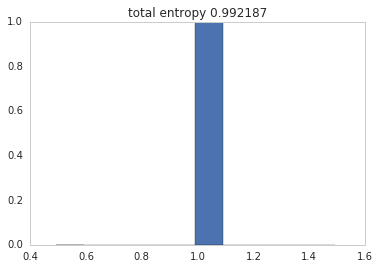

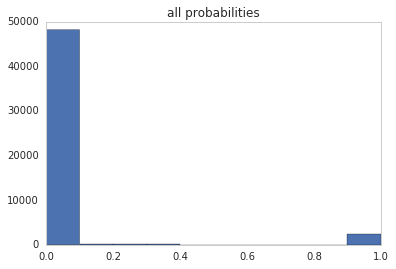

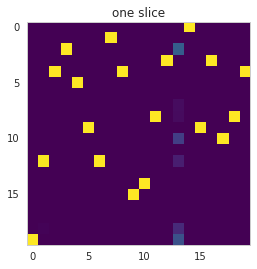

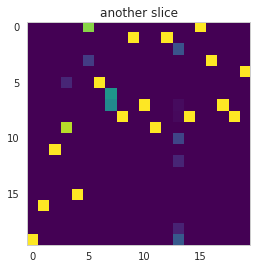

0.05


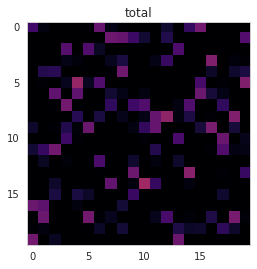

Iter: 13000
Loss: 1.073
()


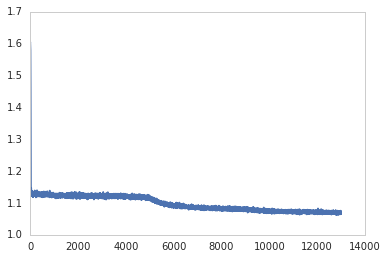

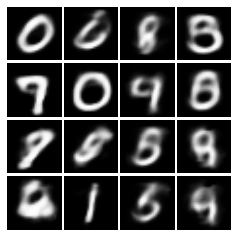

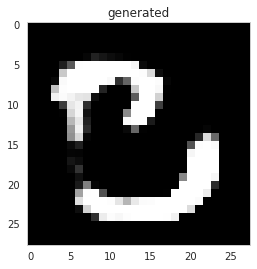

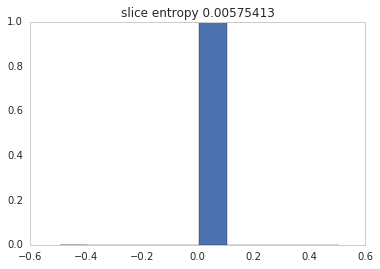

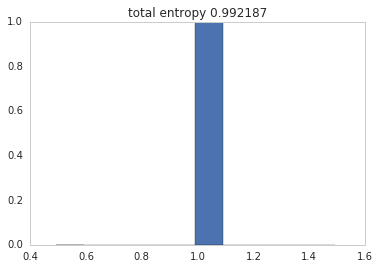

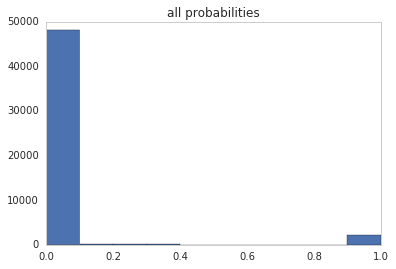

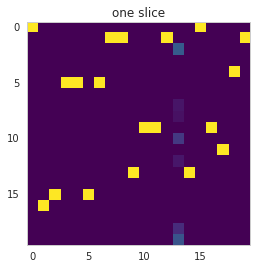

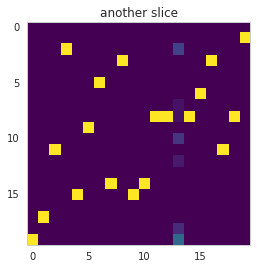

0.05


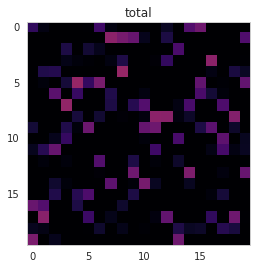

Iter: 14000
Loss: 1.066
()


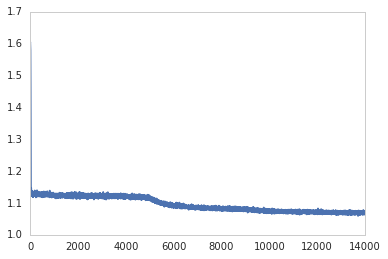

KeyboardInterrupt: 

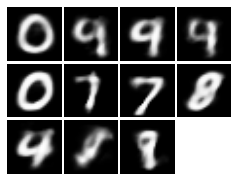

In [208]:
alphabet = "abcdefghijklmnopqrstuvwxyz"
sns.set_style("whitegrid", {'axes.grid' : False})

%matplotlib inline
for it in range(1000000):
    X_mb, _ = mnist.train.next_batch(mb_size)

    _, loss, p_mat_val, entropy_row_val,entropy_total_val = sess.run(
        [solver, vae_loss, symbol_mat, entropy_row, total_entropy], feed_dict={X: X_mb})
    
#     print np.sum(p_mat_val[0], axis = 1)
#     print p_mat_val[0]
#     break
    
    record.append(loss)
    if it % 1000 == 0:
        generated_images = sess.run(
            pixels_generated, feed_dict={input_sequence: np.ones([10,k,d])*.1})[0].reshape([-1,28,28])
        
        plt.imshow(generated_images[0], interpolation = 'nearest', cmap = 'gray', vmin = 0, vmax= 1)
        plt.title("generated")
        plt.show()
        
        
#         print entropy_val
        plt.hist(entropy_val)
        plt.title("slice entropy "+ str(np.min(entropy_val)) )
        plt.show()

        plt.hist(entropy_total_val)
        plt.title("total entropy "+ str(np.min(entropy_total_val)))
        plt.show()
        plt.hist(p_mat_val.flatten())
        plt.title("all probabilities")
        plt.show()
        plt.imshow(p_mat_val[0], interpolation = 'nearest', cmap = 'viridis', vmin = 0, vmax= 1)
        plt.title("one slice")
        plt.show()
        plt.imshow(p_mat_val[1], interpolation = 'nearest', cmap = 'viridis', vmin = 0, vmax= 1)
        plt.title("another slice")
        plt.show()
        print np.mean(p_mat_val)
        plt.imshow(np.mean(p_mat_val, axis=0), interpolation = 'nearest', cmap = 'inferno', vmin = 0, vmax= 1)
        plt.title("total")
        plt.show()
        print('Iter: {}'.format(it))
        print('Loss: {:.4}'. format(loss))
        print()
        plt.plot(record)
        plt.show()
#         samples = sess.run(X_samples, feed_dict={z: np.random.randn(16, z_dim)})
        samples = sess.run(pixels_pred, feed_dict={X: X_mb[:16]})

        fig = plot(samples)
        plt.show()
        i += 1
